In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings("ignore")

In [45]:
digit = load_digits()

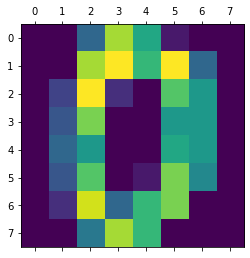

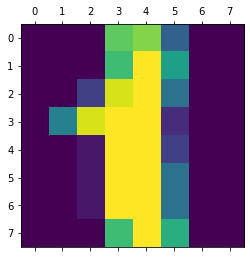

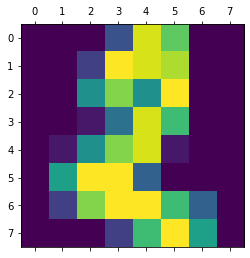

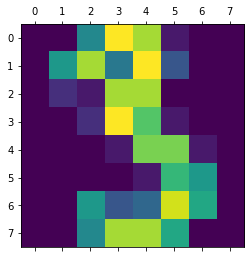

In [46]:
%matplotlib inline
for i in range(4):
    plt.matshow(digit.images[i])

In [47]:
print(digit.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [48]:
print(digit.data.shape)

(1797, 64)


In [49]:
digit.data.dtype

dtype('float64')

### Scaling the DataSet
this is very important to scale the data before pca , standard scaler will make it mean = 0 and std dev = 1

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
digit_new = sc.fit_transform(digit.data)

In [51]:
pca = PCA()
digit_pca = pca.fit_transform(digit_new)

In [52]:
print(np.round(pca.explained_variance_ratio_,3))

[0.12  0.096 0.084 0.065 0.049 0.042 0.039 0.034 0.03  0.029 0.028 0.026
 0.023 0.022 0.022 0.019 0.018 0.016 0.016 0.015 0.013 0.013 0.012 0.011
 0.01  0.009 0.009 0.008 0.008 0.007 0.007 0.007 0.007 0.006 0.006 0.006
 0.005 0.005 0.005 0.004 0.004 0.004 0.004 0.003 0.003 0.003 0.003 0.003
 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001
 0.001 0.    0.    0.   ]


In [53]:
dp = pd.DataFrame(digit_pca)
a=[]
for i in range(1,65):
    a.append('pc{}'.format(i))
dp.columns = [a]
dp.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc55,pc56,pc57,pc58,pc59,pc60,pc61,pc62,pc63,pc64
0,1.914214,-0.954502,-3.946035,2.028723,-0.267173,0.530327,-1.415321,1.496062,0.124914,-0.822246,...,0.217284,-0.184659,-0.152393,0.486203,0.009390,-0.009188,-0.027512,-0.000000e+00,-0.000000e+00,8.243855e-15
1,0.588980,0.924636,3.924755,-1.779850,-0.993430,-0.675652,1.878565,0.556336,1.079877,0.087451,...,0.005322,0.267950,-0.511874,-0.422479,-0.090586,0.127878,-0.103101,5.672049e-16,2.746971e-16,3.086705e-17
2,1.302039,-0.317189,3.023333,-2.043376,-2.081155,0.935121,-1.296200,1.156160,0.785606,-1.099206,...,0.178624,0.067011,0.112209,0.034327,0.444446,-0.518823,0.179429,2.438054e-16,1.588655e-16,2.155553e-17
3,-3.020770,-0.868772,-0.801744,-2.187039,-0.556813,0.727124,0.959766,-1.382638,0.259075,0.744555,...,-0.115443,0.264125,0.018912,-0.153687,0.275277,-0.115922,0.101748,9.273795e-18,-1.533521e-16,1.432069e-17
4,4.528949,-1.093480,0.973121,-1.419510,-1.715106,1.431592,1.073649,-0.968240,-1.660216,1.174593,...,-0.335099,-0.098695,0.292078,0.157340,-0.122873,-0.084901,-0.072045,3.948776e-16,1.382606e-16,9.037551e-18


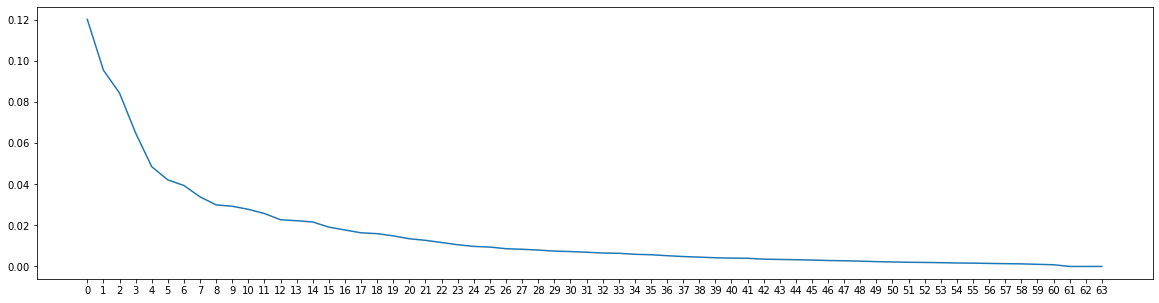

In [54]:
#scree plot
plt.figure(figsize = (20,5))
plt.plot(range(digit_pca.shape[1]), pca.explained_variance_ratio_)
plt.xticks(range(digit_pca.shape[1]))
plt.show()

In [55]:
print(digit.data.shape)

(1797, 64)


In [56]:
pca1 = PCA(14)
digit_pca1 = pca1.fit_transform(digit_new)

In [57]:
print(digit_pca1.shape)

(1797, 14)


In [58]:
print(np.round(pca1.explained_variance_ratio_,3))

[0.12  0.096 0.084 0.065 0.049 0.042 0.039 0.034 0.03  0.029 0.028 0.026
 0.023 0.022]


In [59]:
dp1 = pd.DataFrame(digit_pca1)
list2=[]

for i in range(1,15):
  list2.append('PC{}'.format(i))
  

dp1.columns = [list2]
dp1.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,1.914239,-0.954439,-3.946050,2.028509,-0.266140,0.529207,-1.412167,1.495126,0.123416,-0.834507,-0.511636,-0.796097,0.200320,-0.226973
1,0.588996,0.924644,3.924401,-1.779518,-0.993027,-0.680155,1.876393,0.551186,1.090916,0.089130,-0.503812,0.653721,-0.032193,-0.371553
2,1.302011,-0.317256,3.023587,-2.043303,-2.082630,0.939594,-1.300039,1.159113,0.779048,-1.082624,2.213933,-2.304911,-0.501799,-0.975640
3,-3.020707,-0.868774,-0.801785,-2.187598,-0.556023,0.725659,0.962270,-1.389261,0.244095,0.724815,-1.071087,0.499982,-0.210025,0.971900
4,4.528927,-1.093582,0.973263,-1.419932,-1.715875,1.435761,1.071396,-0.967498,-1.682746,1.182059,-0.999284,-1.361338,-0.330219,-0.117167


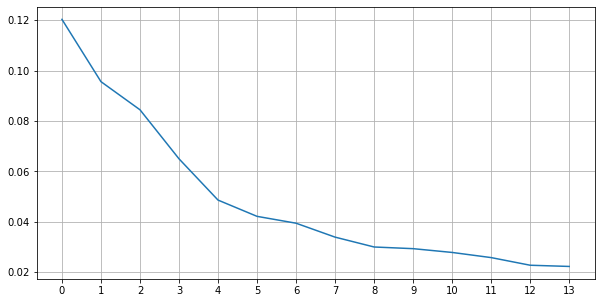

In [60]:
plt.figure(figsize=(10,5))
plt.plot(range(digit_pca1.shape[1]) ,pca1.explained_variance_ratio_)
plt.xticks(range(digit_pca1.shape[1]))
plt.grid(True)
plt.show()

In [61]:
a=[]
for i in range(64):
    a.append(np.var(digit_new[:,i]))

In [62]:
print(np.var(digit_new).sum())
print(sum(a))
print(np.round(pca.explained_variance_.sum()))

0.9531250000000011
61.00000000000006
61.0


Text(0, 0.5, 'PC2')

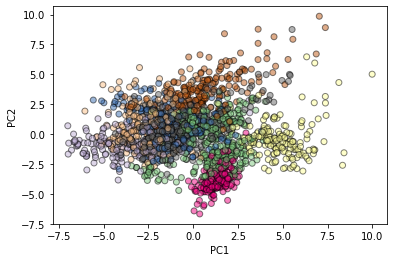

In [63]:
plt.scatter(digit_pca1[:,0],digit_pca1[:,1],c=digit.target,edgecolor = 'black', alpha =0.5,cmap = plt.cm.get_cmap('Accent',10))
plt.xlabel("PC1")
plt.ylabel("PC2")

In [64]:
print(np.round(pca1.explained_variance_,3))

[7.345 5.835 5.154 3.966 2.966 2.572 2.406 2.069 1.83  1.789 1.698 1.573
 1.388 1.359]


In [65]:
print(pca1.n_components_)

14


In [66]:
pca1.noise_variance_

0.38169509867702145

In [67]:
pca.singular_values_

array([1.14853027e+02, 1.02374513e+02, 9.62107804e+01, 8.43999988e+01,
       7.29901087e+01, 6.79661076e+01, 6.57357810e+01, 6.09535699e+01,
       5.73285263e+01, 5.66919151e+01, 5.52207542e+01, 5.31496988e+01,
       4.99411577e+01, 4.94101975e+01, 4.87181644e+01, 4.58066808e+01,
       4.41169066e+01, 4.23745489e+01, 4.18329026e+01, 4.04030531e+01,
       3.84396124e+01, 3.73396975e+01, 3.57485095e+01, 3.40493828e+01,
       3.26972794e+01, 3.21775889e+01, 3.07572734e+01, 3.02837051e+01,
       2.95703806e+01, 2.86052359e+01, 2.82021522e+01, 2.75400136e+01,
       2.67730260e+01, 2.65031620e+01, 2.54609018e+01, 2.50218124e+01,
       2.39581918e+01, 2.29813625e+01, 2.23014224e+01, 2.15373702e+01,
       2.10974689e+01, 2.08631842e+01, 1.97680870e+01, 1.93277180e+01,
       1.89568789e+01, 1.84646678e+01, 1.77856004e+01, 1.74091710e+01,
       1.68552602e+01, 1.60322561e+01, 1.54675990e+01, 1.49391305e+01,
       1.46394964e+01, 1.41756213e+01, 1.35682641e+01, 1.32944400e+01,
      